In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/1_Bhrathi_DPP"

/content/drive/MyDrive/1_Bhrathi_DPP


In [ ]:
!pwd

/content/drive/MyDrive/1_Bhrathi_DPP


### Import Libraries

In [ ]:
!pip install tensorflow==2.8.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 55.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attemp

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Data Loading

In [ ]:
import os
print(os.getcwd())

/content/drive/MyDrive/1_Bhrathi_DPP


In [ ]:
df = pd.read_csv('input/cleaned_data.csv')

In [ ]:
df.shape

(91308, 2)

In [ ]:
df.head()

,cleaned_text,class
0,i want to be freefree of this body free of thi...,depression
1,i feel like i am on firefire damage everything...,depression
2,i can not do it anymorelong story short i am m...,depression
3,i got a notif while scrolling just now i thoug...,no-depression
4,i need helpcan someone talk with me please,depression


### Tokenizing Text Data

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(df["cleaned_text"])

In [ ]:
num_data = tok.texts_to_sequences(df["cleaned_text"])

for sample in num_data[:5]:
    print(sample, '\n')

[1, 21, 2, 26, 19576, 12, 22, 341, 325, 12, 22, 388, 1, 9, 10061, 2, 325, 12, 22, 153, 1, 11, 4, 21, 2, 35, 1067, 86] 

[1, 35, 25, 1, 9, 27, 27794, 1461, 124, 8, 200, 17, 948, 29, 8, 7, 191, 12, 440, 1, 392, 287, 1568, 1550, 19, 61, 140, 487, 190, 53, 43, 284, 13, 139, 1750, 93] 

[1, 24, 4, 11, 8, 19577, 396, 585, 1, 9, 794, 308, 2, 6, 158, 1, 24, 4, 68, 2201, 19, 39, 2235, 73, 223, 686, 1, 14, 234, 169, 1, 28, 137, 1449, 2, 5, 1160, 12, 3589, 186, 175, 659, 17, 42, 142, 13, 22, 7, 1709, 3, 28, 64, 205, 1, 9, 23, 234, 3, 144] 

[1, 96, 5, 13627, 221, 1668, 15, 47, 1, 111, 8, 36, 5, 334, 20, 3500, 8, 7, 15, 10, 419, 456, 13, 1, 14, 485, 235, 1, 9, 15821] 

[1, 65, 5851, 67, 87, 29, 13, 106] 



In [ ]:
vocab_size=len(tok.word_index)+1
print("Unique tokens size are {}.".format(vocab_size))

Unique tokens size are 74571.


In [ ]:
tok.word_index.items()

dict_items([('i', 1), ('to', 2), ('and', 3), ('not', 4), ('a', 5), ('the', 6), ('is', 7), ('it', 8), ('am', 9), ('my', 10), ('do', 11), ('of', 12), ('me', 13), ('have', 14), ('just', 15), ('you', 16), ('in', 17), ('that', 18), ('for', 19), ('but', 20), ('want', 21), ('this', 22), ('so', 23), ('can', 24), ('like', 25), ('be', 26), ('on', 27), ('will', 28), ('with', 29), ('know', 30), ('if', 31), ('what', 32), ('are', 33), ('all', 34), ('feel', 35), ('was', 36), ('or', 37), ('about', 38), ('myself', 39), ('get', 40), ('no', 41), ('life', 42), ('would', 43), ('going', 44), ('how', 45), ('filler', 46), ('now', 47), ('out', 48), ('people', 49), ('up', 50), ('one', 51), ('at', 52), ('they', 53), ('really', 54), ('time', 55), ('because', 56), ('think', 57), ('day', 58), ('been', 59), ('friend', 60), ('help', 61), ('there', 62), ('why', 63), ('go', 64), ('need', 65), ('when', 66), ('someone', 67), ('even', 68), ('kill', 69), ('make', 70), ('anyone', 71), ('die', 72), ('year', 73), ('fucking', 

#### Saving Tokenizer Model

In [ ]:
with open(file="models/tokens.pkl",mode="wb") as file:
    pickle.dump(obj=tok,file=file)

### Padding Text Sequences

In [ ]:
pad_text = pad_sequences(sequences=num_data, maxlen=100, padding="post", truncating="post")

In [ ]:
pad_text[:5]

array([[    1,    21,     2,    26, 19576,    12,    22,   341,   325,
           12,    22,   388,     1,     9, 10061,     2,   325,    12,
           22,   153,     1,    11,     4,    21,     2,    35,  1067,
           86,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    1,    35,    25,     1,     9,    27, 27794,  1461,   124,
            8,   200,    17,   948,    29,     8,     7,   191,    12,
          440,     1,   392,   287,  1568,  1550,    19,    6

In [ ]:
df.head()

,cleaned_text,class
0,i want to be freefree of this body free of thi...,depression
1,i feel like i am on firefire damage everything...,depression
2,i can not do it anymorelong story short i am m...,depression
3,i got a notif while scrolling just now i thoug...,no-depression
4,i need helpcan someone talk with me please,depression


In [ ]:
class_labels = df['class'].unique().tolist()
class_labels.sort()
print(class_labels)

['depression', 'no-depression']


In [ ]:
df['class'].value_counts()

,count
class,
depression,45654
no-depression,45654


In [ ]:
class_dict={}

for idx, label in enumerate(class_labels):
    class_dict[label] = idx

print(class_dict)

{'depression': 0, 'no-depression': 1}


In [ ]:
df['class'] = df['class'].map(class_dict)
df.head()

,cleaned_text,class
0,i want to be freefree of this body free of thi...,0
1,i feel like i am on firefire damage everything...,0
2,i can not do it anymorelong story short i am m...,0
3,i got a notif while scrolling just now i thoug...,1
4,i need helpcan someone talk with me please,0


In [ ]:
y = df['class'].values
print(y[:100].tolist())

[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]


### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pad_text, y, test_size=0.2, random_state=SEED, shuffle=True, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(73046, 100) (18262, 100) (73046,) (18262,)


## Support Vector Classifier Model

#### Training SVM Classifier

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train.ravel())

#### Predicting Test Data with SVM Model

In [ ]:
svc_prediction = svc_model.predict(X_test)
print(svc_prediction[:100].tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1]


#### Displaying True Labels

In [ ]:
true_labels = y_test.ravel()
print(true_labels[:100].tolist())

[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]


#### Calculating SVM Model Accuracy

In [ ]:
svc_model_accuracy = accuracy_score(y_true=true_labels, y_pred=svc_prediction)
print("Validation accuracy of Support Vector Classifier model is {:.2f}%".format(svc_model_accuracy*100))

Validation accuracy of Support Vector Classifier model is 65.79%


#### Displaying Classification Report

In [ ]:
print(classification_report(y_true=true_labels,y_pred=svc_prediction, target_names=class_labels))

               precision    recall  f1-score   support

   depression       0.70      0.55      0.62      9131
no-depression       0.63      0.76      0.69      9131

     accuracy                           0.66     18262
    macro avg       0.66      0.66      0.65     18262
 weighted avg       0.66      0.66      0.65     18262



#### Visualizing SVC Confusion Matrix

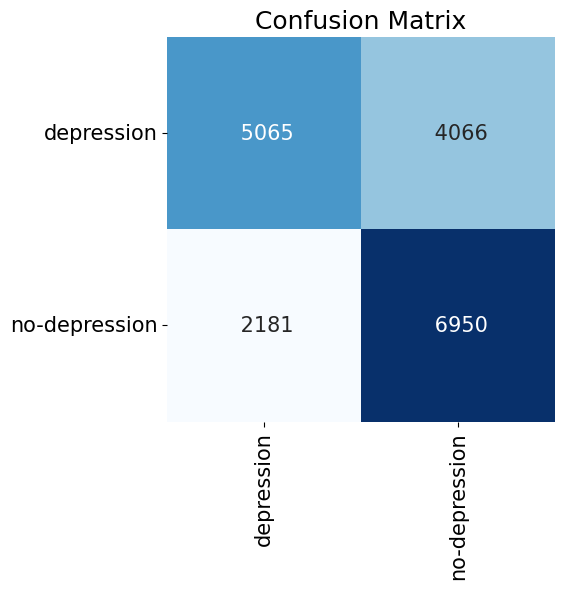

In [ ]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_labels, y_pred=svc_prediction),
            annot=True,
            cmap=plt.cm.Blues,
            fmt = "5d",
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Saving SVM Model

In [ ]:
with open(file="models/SupportVectorClassifier_model.pkl", mode='wb') as file:
    pickle.dump(obj=svc_model, file=file)

---

### Loading GloVe Embeddings

In [ ]:
import os

# Function to search for the file
def find_file(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)
    return None

# Search for 'glove.6B.50d.txt' starting from your home directory
file_name = 'glove.6B.50d.txt'
home_directory = os.path.expanduser('~')
file_path = find_file(file_name, home_directory)

print("File Path:", file_path)

File Path: None


In [ ]:
embeddings_index = {}
file_path = "input/glove.6B.50d.txt"
with open(file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
embedding_dimention = 50
def embedding_matrix_creater(embedding_dimention, word_index):
    embedding_matrix = np.zeros((len(word_index)+1, embedding_dimention))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix
embedding_matrix = embedding_matrix_creater(50, word_index=tok.word_index)
print("Glove Loded!")

Glove Loded!


## Convolutional Neural Network Long Short-Term Memory Model

#### Import Necessary Modules

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import to_categorical

In [ ]:
# Convert y_train and y_test to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [ ]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


#### Build and Compile CNN-LSTM Model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=74571, output_dim=50, input_length=100, weights=[embedding_matrix]))

# Block 1
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(MaxPooling1D(pool_size=2))

# Block 2
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(MaxPooling1D(pool_size=2))

# Block 3
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Block 4
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(MaxPooling1D(pool_size=2))

# Block 5
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(MaxPooling1D(pool_size=2))

# Block 6
model.add(Conv1D(filters=1024, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(Conv1D(filters=1024, kernel_size=3, activation='relu', padding="same", kernel_regularizer=L2()))
model.add(BatchNormalization())
# No further pooling here (length = 3)

# Bidirectional LSTM Layers
model.add(Bidirectional(LSTM(units=200, return_sequences=True, kernel_regularizer=L2())))
model.add(Bidirectional(LSTM(units=200, return_sequences=True, kernel_regularizer=L2())))

# Global Average Pooling and Dense Layers
model.add(GlobalAveragePooling1D())  # Final global pooling
model.add(Dense(512, activation='relu', kernel_regularizer=L2()))
model.add(Dense(len(class_labels), activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           3728550   
                                                                 
 conv1d (Conv1D)             (None, 100, 64)           9664      
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 128)           49280     
                                                        

#### Training CLSTM Model

In [ ]:
EPOCHS = 15

history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=EPOCHS,
    validation_data=(X_test,y_test),
    callbacks=ReduceLROnPlateau(monitor='val_accuracy', patience=2, min_lr=0)
)

Epoch 1/15
1142/1142 [==============================] - 285s 245ms/step - loss: 12.4341 - accuracy: 0.8458 - val_loss: 1.3023 - val_accuracy: 0.8702 - lr: 1.0000e-04
Epoch 2/15
1142/1142 [==============================] - 278s 243ms/step - loss: 0.9523 - accuracy: 0.9095 - val_loss: 0.7549 - val_accuracy: 0.9210 - lr: 1.0000e-04
Epoch 3/15
1142/1142 [==============================] - 275s 241ms/step - loss: 0.6580 - accuracy: 0.9295 - val_loss: 0.5946 - val_accuracy: 0.9269 - lr: 1.0000e-04
Epoch 4/15
1142/1142 [==============================] - 274s 240ms/step - loss: 0.5124 - accuracy: 0.9431 - val_loss: 0.4754 - val_accuracy: 0.9387 - lr: 1.0000e-04
Epoch 5/15
1142/1142 [==============================] - 275s 241ms/step - loss: 0.4187 - accuracy: 0.9537 - val_loss: 0.4727 - val_accuracy: 0.9272 - lr: 1.0000e-04
Epoch 6/15
1142/1142 [==============================] - 274s 240ms/step - loss: 0.3432 - accuracy: 0.9666 - val_loss: 0.5854 - val_accuracy: 0.8932 - lr: 1.0000e-04
Epoch 7/1

#### Visualizing Training Metrics

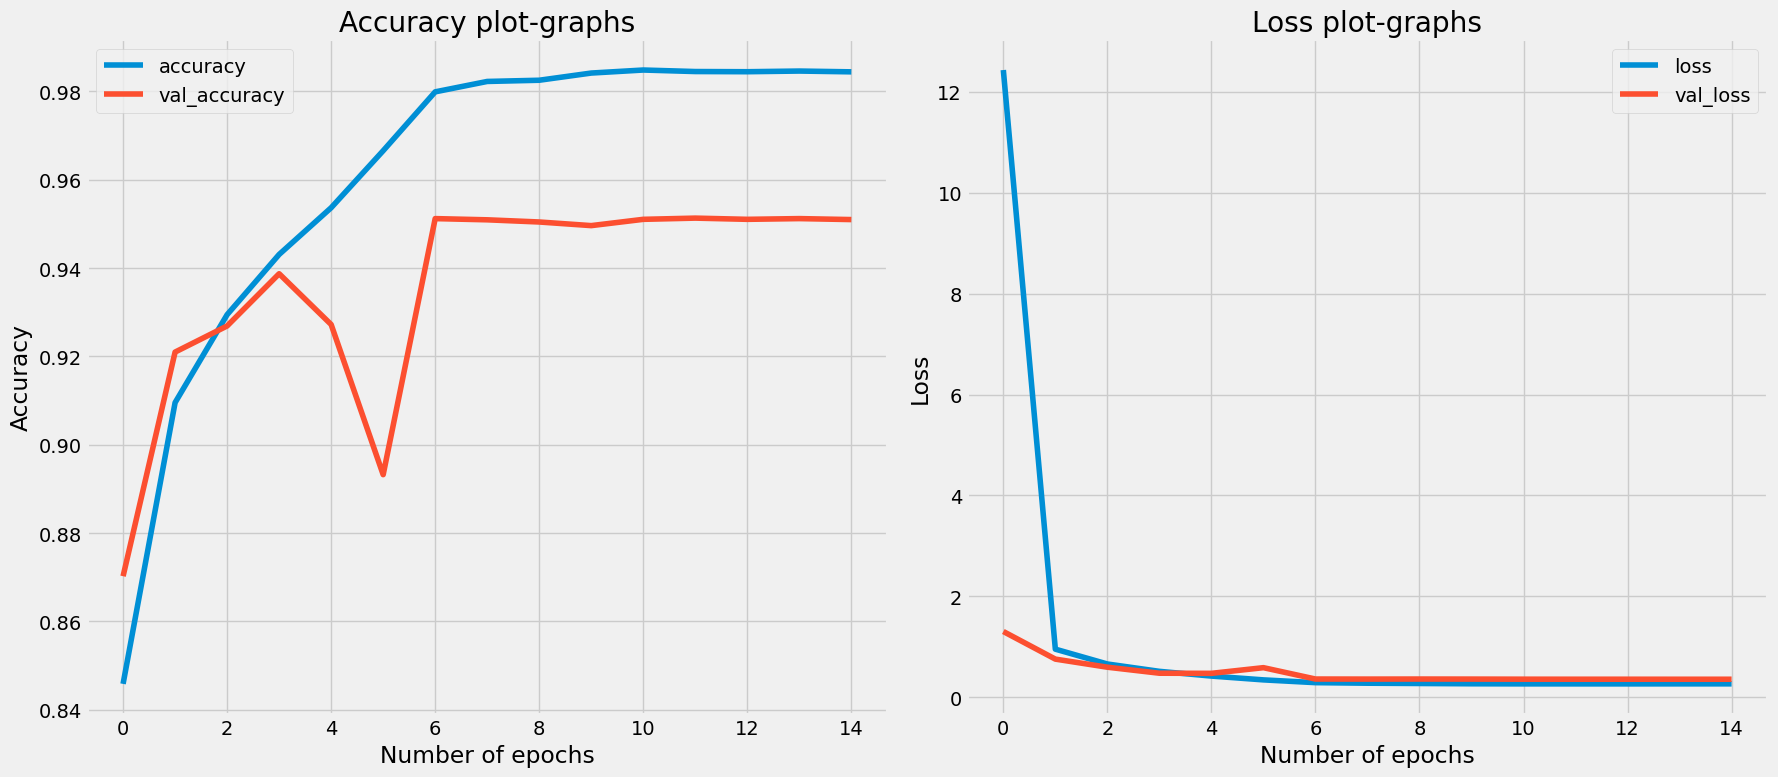

In [ ]:
with plt.style.context(style='fivethirtyeight'):
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    axes[0].plot(history.history["accuracy"],label="accuracy")
    axes[0].plot(history.history["val_accuracy"],label="val_accuracy")
    axes[0].set_title(label='Accuracy plot-graphs')
    axes[0].set_xlabel(xlabel='Number of epochs')
    axes[0].set_ylabel(ylabel='Accuracy')
    axes[0].legend()
    axes[1].plot(history.history["loss"],label="loss")
    axes[1].plot(history.history["val_loss"],label="val_loss")
    axes[1].set_title(label='Loss plot-graphs')
    axes[1].set_xlabel(xlabel='Number of epochs')
    axes[1].set_ylabel(ylabel='Loss')
    axes[1].legend()
    fig.tight_layout()
    plt.show()

In [ ]:
clstm_prediction = model.predict(X_test, batch_size=64, verbose=1)
print(clstm_prediction)

286/286 [==============================] - 7s 20ms/step
[[0.99453676 0.00547042]
 [0.00566486 0.9942773 ]
 [0.00297144 0.99698997]
 ...
 [0.00770268 0.99227715]
 [0.998857   0.00113741]
 [0.9970491  0.00294438]]


#### Predicting Test Data with CLSTM Model

In [ ]:
clstm_pred=[]

for prediction in clstm_prediction:
    clstm_pred.append(np.argmax(prediction))
print(clstm_pred[:100])

[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]


#### Displaying True Labels

In [ ]:
true_labels=[]

for label in y_test:
    true_labels.append(np.argmax(label))
print(true_labels[:100])

[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]


#### Calculating CLSTM Model Accuracy

In [ ]:
clstm_accuracy = accuracy_score(y_true=true_labels, y_pred=clstm_pred)
print(f"Validation accuracy of Convolutional Long Short Term Memory is {clstm_accuracy*100.0:0.2f}%")

Validation accuracy of Convolutional Long Short Term Memory is 95.10%


#### Displaying CLSTM Classification Report

In [ ]:
print(classification_report(y_true=true_labels, y_pred=clstm_pred, target_names=class_labels))

               precision    recall  f1-score   support

   depression       0.95      0.95      0.95      9131
no-depression       0.95      0.95      0.95      9131

     accuracy                           0.95     18262
    macro avg       0.95      0.95      0.95     18262
 weighted avg       0.95      0.95      0.95     18262



#### Visualizing CLSTM Confusion Matrix

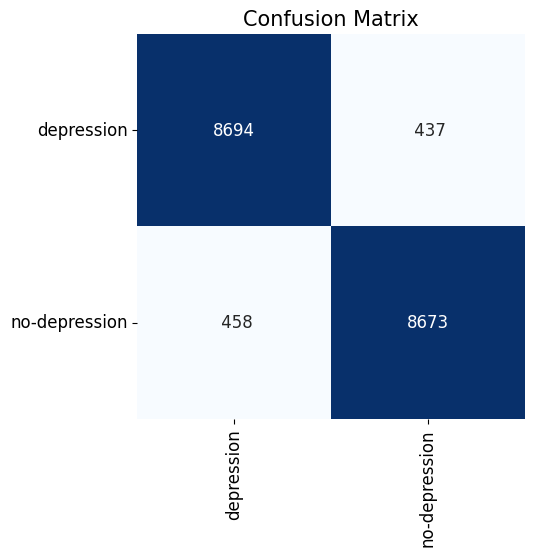

In [ ]:
plt.figure(figsize=(5, 5))
plt.rcParams['font.size'] = 12
sns.heatmap(
    data=confusion_matrix(y_true=true_labels, y_pred=clstm_pred),
    annot=True,
    cmap=plt.cm.Blues,
    fmt = "4d",
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False
)

plt.title(label="Confusion Matrix", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Saving CLSTM Model

In [ ]:
model.save("models/ConvolutionalLongShortTermMemory.h5")